# Challenge Creation

### Import necessary libraries

In [4]:
import matplotlib.pyplot as plt, numpy as np
from scipy.fftpack import dct
from PIL import Image

### Loading Images

In [5]:
img = Image.open('./images/original_rick.png')
flag = Image.open('./images/hidden_flag.png')

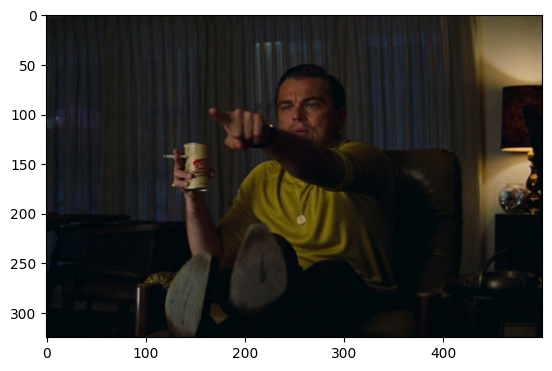

In [6]:
plt.imshow(img)

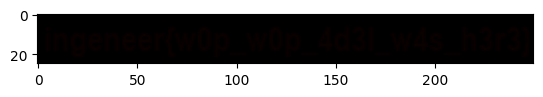

In [7]:
plt.imshow(flag)

### Here's where I'm going to hide the flag

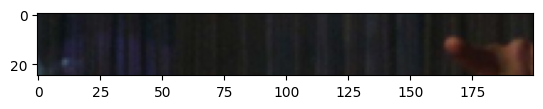

In [8]:
plt.imshow(img.crop((0, 85, 200, 110)))

### Normalizing images

In [9]:
norm_img = (np.array(img).astype(float) / 256)[:,:,:3]
norm_flag = (np.array(flag).astype(float) / 256)[:,:,:3]

### Hide the flag in the image

In [10]:
flag_img = np.zeros_like(norm_img)

row, col = 85, 0

for i in range(norm_flag.shape[0]):
    for j in range(norm_flag.shape[1]):
        flag_img[row + i, col + j] = norm_flag[i, j]

flag_img = dct(flag_img, axis=1, norm='ortho')

new_img = norm_img + flag_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


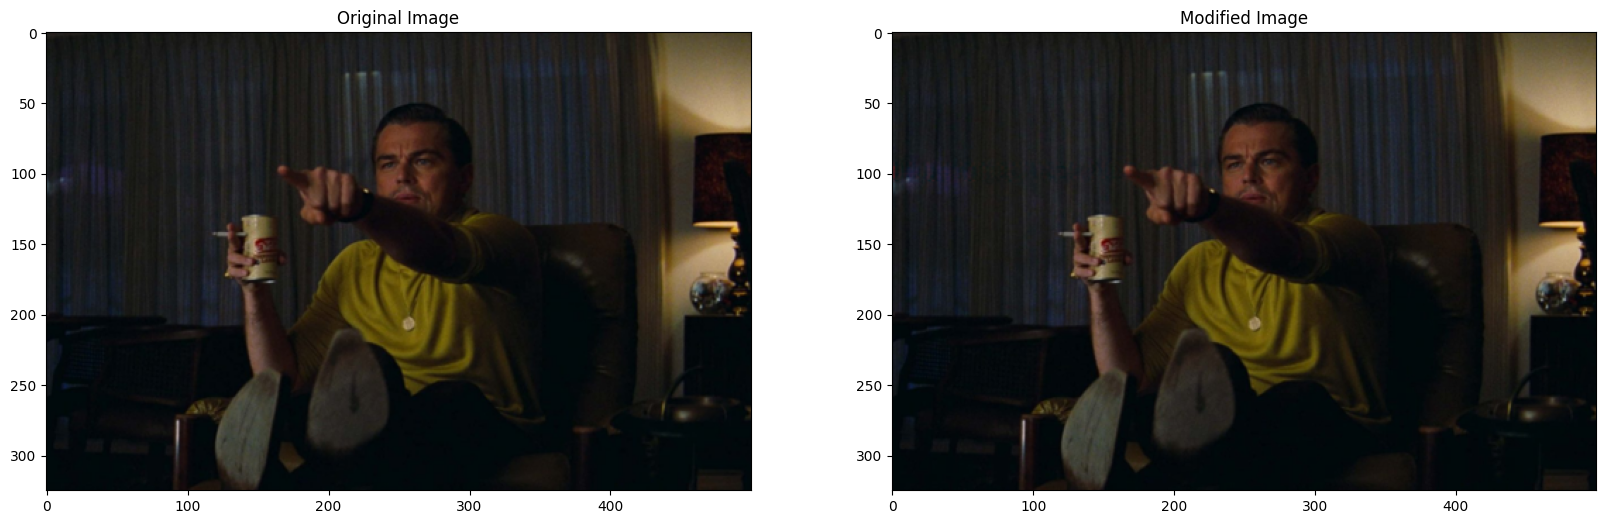

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[1].imshow(new_img)
axs[1].set_title('Modified Image')
plt.show()

### Save the new image

In [142]:
new = Image.fromarray((new_img*256).astype(np.uint8))
new.save('images/hidden_rick.png')